In [1]:
import sys
sys.path.append("../../")

from astronn import datasets
from astronn import models

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Create a dataset with 1Mll theoretical stars oscilations

In [2]:
star_models = datasets.starmodels()
df = star_models.load("/home/roberto/Downloads/dataall_parts/*", batch_size=150)

#### Print sample vectors from Dataset

In [3]:
for row in df.take(1):
    print(row)

(<tf.Tensor: id=1732, shape=(150, 406, 3), dtype=float32, numpy=
array([[[ 0.000e+00,  0.000e+00,  1.000e+00],
        [ 0.000e+00,  0.000e+00,  9.896e-01],
        [ 0.000e+00,  0.000e+00,  9.111e-01],
        ...,
        [ 0.000e+00,  0.000e+00,  2.390e-02],
        [ 0.000e+00,  0.000e+00,  2.750e-02],
        [ 0.000e+00,  0.000e+00,  2.015e-01]],

       [[ 0.000e+00,  0.000e+00,  1.000e+00],
        [ 0.000e+00,  0.000e+00,  9.903e-01],
        [ 0.000e+00,  2.000e+00,  9.166e-01],
        ...,
        [ 0.000e+00,  0.000e+00, -3.230e-02],
        [ 0.000e+00,  0.000e+00, -2.450e-02],
        [ 0.000e+00,  0.000e+00,  1.318e-01]],

       [[ 0.000e+00,  0.000e+00,  9.999e-01],
        [ 0.000e+00,  1.000e+00,  9.914e-01],
        [ 0.000e+00,  0.000e+00,  9.263e-01],
        ...,
        [ 0.000e+00,  0.000e+00,  0.000e+00],
        [ 0.000e+00,  0.000e+00,  5.000e-04],
        [ 0.000e+00,  0.000e+00,  1.181e-01]],

       ...,

       [[ 0.000e+00,  0.000e+00,  1.000e+00],
   

In [4]:
def normalize(x):
    """
    """
    return (x - np.min(x)) / (np.max(x) - np.min(x))

#### Take one example

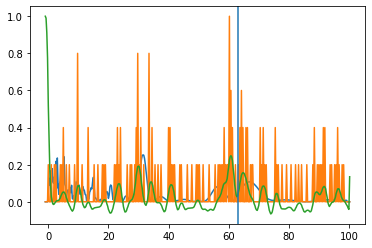

In [5]:
line = [line for line in df.take(1)]

x = np.arange(-1, 100.5, 0.25)
plt.plot(x, line[0][0][0,:,0])
plt.plot(x, normalize(line[0][0][0,:,1]))
plt.plot(x, line[0][0][0,:,2])

target = np.where(line[0][1][0].numpy().flat == 1)[0].flat[0]
plt.axvline(x=target)

#### Sampling to check non all-zeros one-hot vector target

In [6]:
aux = []
for row in df.take(50):
    for r in row[1]:
        if len(np.where(r[0])[0]) > 0:
            aux.append(np.where(r[0])[0][0])
        else:
            print(row)
            print(r[0])
            0 / 0

(array([ 540.,  888.,  828., 1104., 1339., 1187., 1118.,  300.,  131.,
          65.]),
 array([19., 27., 35., 43., 51., 59., 67., 75., 83., 91., 99.]),
 <a list of 10 Patch objects>)

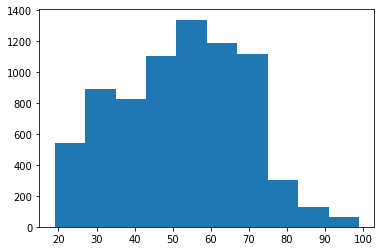

In [7]:
plt.hist(aux) # PLot histogram of targets

#### Create a Separable convolution model

In [8]:
sepconv_mod = models.separableconvnn() #init model
sepconv_mod.compile(learning_rate=0.01) # compile model

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv1d (SeparableC (None, 375, 10)           388       
_________________________________________________________________
separable_conv1d_1 (Separabl (None, 312, 10)           750       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 156, 10)           0         
_________________________________________________________________
dropout (Dropout)            (None, 156, 10)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1560)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               312200    
____________________________

In [9]:
#import rpy2.robjects as robjects
#from rpy2.robjects import pandas2ri
#pandas2ri.activate()
#readRDS = robjects.r['readRDS']
#X = readRDS('~/Projects/asteroseismologyNN/data/x_train.rds')
#y = readRDS('~/Projects/asteroseismologyNN/data/y_dnu_train.rds')
#history = sepconv_mod.model.fit(X, y, epochs=30)

#### Train model with dataset

In [10]:
history = sepconv_mod.model.fit(df, steps_per_epoch=20, epochs=50)

Train for 20 steps
Epoch 1/50
20/20 [==============================] - 3s 161ms/step - loss: 4.2574 - accuracy: 0.0180
Epoch 2/50
20/20 [==============================] - 2s 107ms/step - loss: 2.8249 - accuracy: 0.0166
Epoch 3/50
20/20 [==============================] - 2s 107ms/step - loss: 2.2287 - accuracy: 0.0173
Epoch 4/50
20/20 [==============================] - 2s 107ms/step - loss: 2.0514 - accuracy: 0.0175
Epoch 5/50
20/20 [==============================] - 2s 108ms/step - loss: 1.9993 - accuracy: 0.0176
Epoch 6/50
20/20 [==============================] - 2s 108ms/step - loss: 1.8733 - accuracy: 0.0184
Epoch 7/50
20/20 [==============================] - 2s 107ms/step - loss: 1.8352 - accuracy: 0.0189
Epoch 8/50
20/20 [==============================] - 2s 107ms/step - loss: 1.7808 - accuracy: 0.0187
Epoch 9/50
20/20 [==============================] - 2s 107ms/step - loss: 1.8679 - accuracy: 0.0190
Epoch 10/50
20/20 [==============================] - 2s 107ms/step - loss: 1.8967

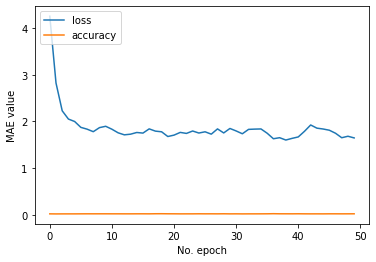

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

#### Save models and weigths on disk

In [12]:
sepconv_mod.save("/tmp/sepconvnn")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/sepconvnn/assets


#### Inference on one sample star

In [13]:
for row in df.take(1):
    print("Batch shape (%s %s)" % (row[0].shape, row[1].shape))
    # Select first row on the batch
    X_star_test = row[0][0].numpy()
    y_star_test = row[1][0].numpy()
    
y_hats = sepconv_mod.predict_classes(X_star_test.reshape(1, 406, 3))
print("\nInference: Y_hat=%s | Y_test=%s" % (y_hats, np.where(y_star_test[0]==1)[0]))

Batch shape ((150, 406, 3) (150, 1, 100))

Inference: Y_hat=[47] | Y_test=[46]
